### MovieLens 100K movie ratings exploratory data analysis

#### Set working directory and importing required packages

In [20]:
# set working directory
import os
os.getcwd()
# Change the working directory
new_directory = "D:/Ph.D_materials/Programming/PYTHON/"

# Change the working directory
os.chdir(new_directory)

# Verify the new working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: D:\Ph.D_materials\Programming\PYTHON


In [21]:
%matplotlib inline   # The %matplotlib inline command is a magic command
                      # in Jupyter Notebook that enables the rendering of
                      # matplotlib plots 
                      # # directly in the output cell of the notebook.

UsageError: unrecognized arguments: # The %matplotlib inline command is a magic command


In [22]:
#Import required libraries
# -------------------------
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Reading u data set

In [23]:
# read u.data file from the folder and name the columns 
# -----------------------------------------------------
ratings = pd.read_csv(r'D:\\Ph.D_materials\\Programming\\PYTHON\\ml-100k\\u.DATA',
                      delimiter = '\t',names= ['UseID', 'ItemID', 'rating', 'Timestamp' ])

print(ratings.shape)  # check data dimension

ratings.head(6)  #  view the top 6 observations
 

(100000, 4)


,UseID,ItemID,rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806


The u data file has four variables and 100000 samples.

In [24]:
# Getting more info from the data such as the rangeindex
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   UseID      100000 non-null  int64
 1   ItemID     100000 non-null  int64
 2   rating     100000 non-null  int64
 3   Timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [25]:
#  missing value check
ratings.isnull().sum()


UseID        0
ItemID       0
rating       0
Timestamp    0
dtype: int64

Ideally, there is no missing value for any of the ratings variable as the result shows.

#### Importing the item file with column names 

In [26]:
# Importing the item file with column names 
col_n = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']

movies = pd.read_csv(r"D:\Ph.D_materials\Programming\PYTHON\ml-100k\u.item", 
                       sep = '|',encoding = 'latin-1',names=col_n )

print(movies.shape)

movies.head(6)

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data has 1682 observations with 24 variables.

In [27]:
# Get more info from movies data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

The above result displays the various types of movies (19 types) including their unique id, title, release date and video release date. It is quite interesting to the number of category of movies that exist in our contemporary world.

#### Removing some irrelevant columns

In [28]:
# Dropping irrelevant columns
movies.drop(columns= ['video release date', 'IMDb URL'], inplace=True)  #drop unnecessary columns 


In [29]:
# looking at the counts of individual genres
l = []
for i in movies.loc[ :,'unknown' : 'Western'].columns:
    b = movies[i].value_counts()[1]
    l.append(b)
print(l)
print(movies.loc[:,'unknown' : 'Western'].columns)

[2, 251, 135, 42, 122, 505, 109, 50, 725, 22, 24, 92, 56, 61, 247, 101, 251, 71, 27]
Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [30]:
# A further look into the unknown movie category
movies[movies['unknown']== 1]


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# let's see if there is information about the movie_id 1373
ratings[ratings.ItemID == 1373]

,UseID,ItemID,rating,Timestamp
8567,181,1373,1,878962052


In [32]:
# movies.drop(movies[movies['unknown'] == 1].index, axis=0, inplace=True)
movies.drop(columns= 'unknown',inplace=True)

Since the unknown column doesn't have a lot of info and the only movie associated with it was rated only once, it is okay to drop it as done above.


In [33]:
# Check final dimension of movies data
# ------------------------------------
print(movies.shape)
movies.head()

(1682, 21)


,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Import U.user data adding column names

In [34]:
# read the u.user data and name the columns 
users = pd.read_csv(r"D:\Ph.D_materials\Programming\PYTHON\ml-100k\u.user",
                    sep = '|', names= ['UserID',  'Age', 'Gender', 'Occupation','Zip-code'])
print(users.shape)
users.head()

(943, 5)


,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [35]:
#  missing value check
users.isnull().sum()


UserID        0
Age           0
Gender        0
Occupation    0
Zip-code      0
dtype: int64

#### Univariate plots of some variables: 'rating', 'Age', 'release date', 'Gender' and 'Occupation'


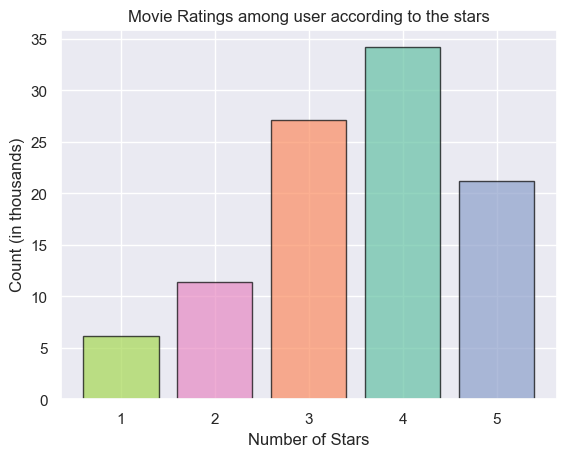

In [36]:
# Bar chart to view distribution of ratings accross all movies
# ------------------------------------------------------------
x = ratings.rating.value_counts().index    #Values for x-axis
y = [ratings['rating'].value_counts()[i]/1000 for i in x]   #count(in thousands) on y-axis 
colors = sns.color_palette("Set2")   # set color palette
plt.bar(x, y, align='center', color=colors, edgecolor='black', alpha=0.7)  # Plot a bar chart
plt.xlabel('Number of Stars')
plt.ylabel('Count (in thousands)')
plt.title('Movie Ratings among user according to the stars')
plt.show()  

C:\Users\bigco\AppData\Local\Temp\ipykernel_27908\437965201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age, color = "grey")


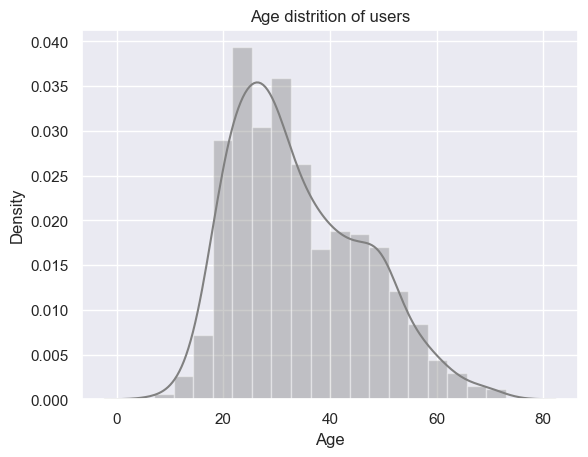

In [48]:
# Distribution of age 
sns.set()    #setting seaborn style to default
sns.distplot(users.Age, color = "grey")
plt.title('Age distrition of users')
plt.show()

C:\Users\bigco\AppData\Local\Temp\ipykernel_27908\1056457833.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies.release_year)


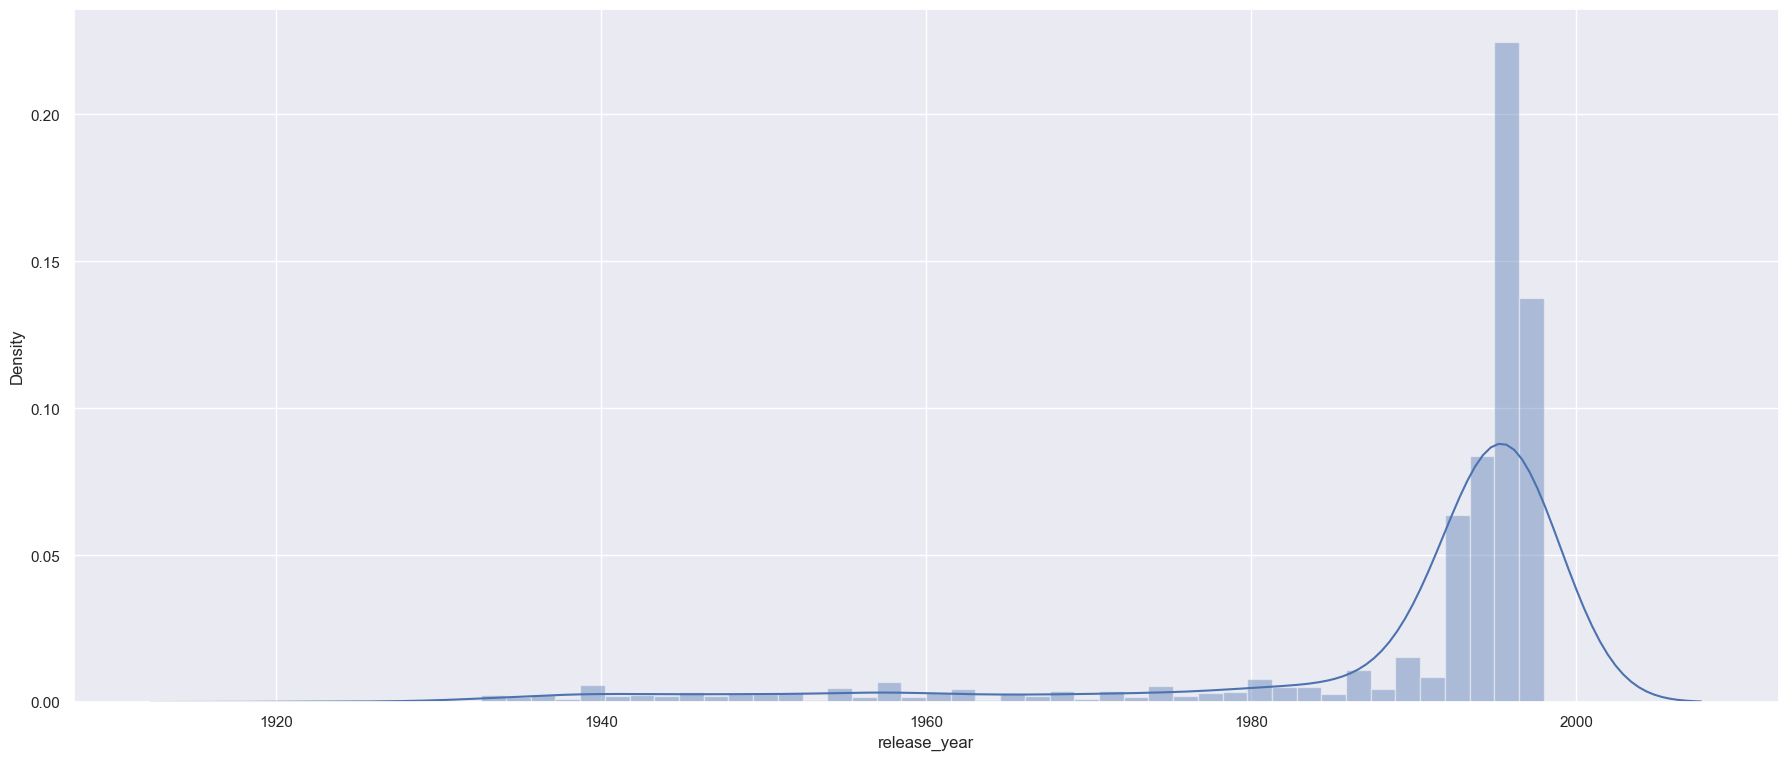

In [51]:
# Distribution of movies w.r.t release year
movies['release_year'] = movies['release date'].str.split('-', expand = True)[2]  #seperating out the year from the date
# movies['release_year'] = movies.release_year.astype(int)  # changing the type to int
plt.figure(figsize=(22,9))    #increasing the figure size
sns.distplot(movies.release_year)
plt.show()

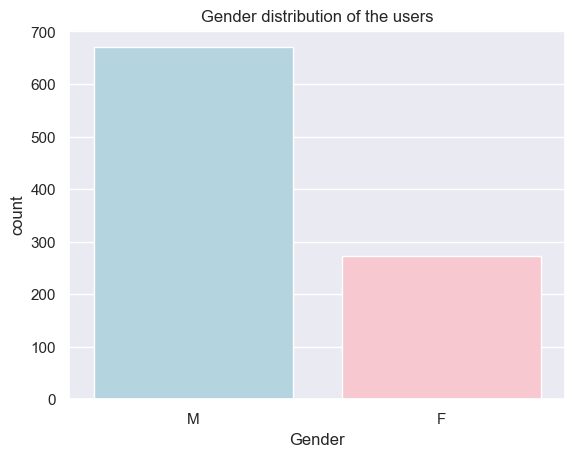

In [39]:
#Gender distribution
sns.countplot(x = 'Gender', data=users, palette = ['lightblue', 'pink'])
plt.title('Gender distribution of the users')
plt.show()

# using plotnine to generate similar plot
# ggplot(users, aes(x = Gender)) +
# geom_bar(fill = Gender) +
# labs(x = "Gender", y = "Frequency") +
# theme_bw()

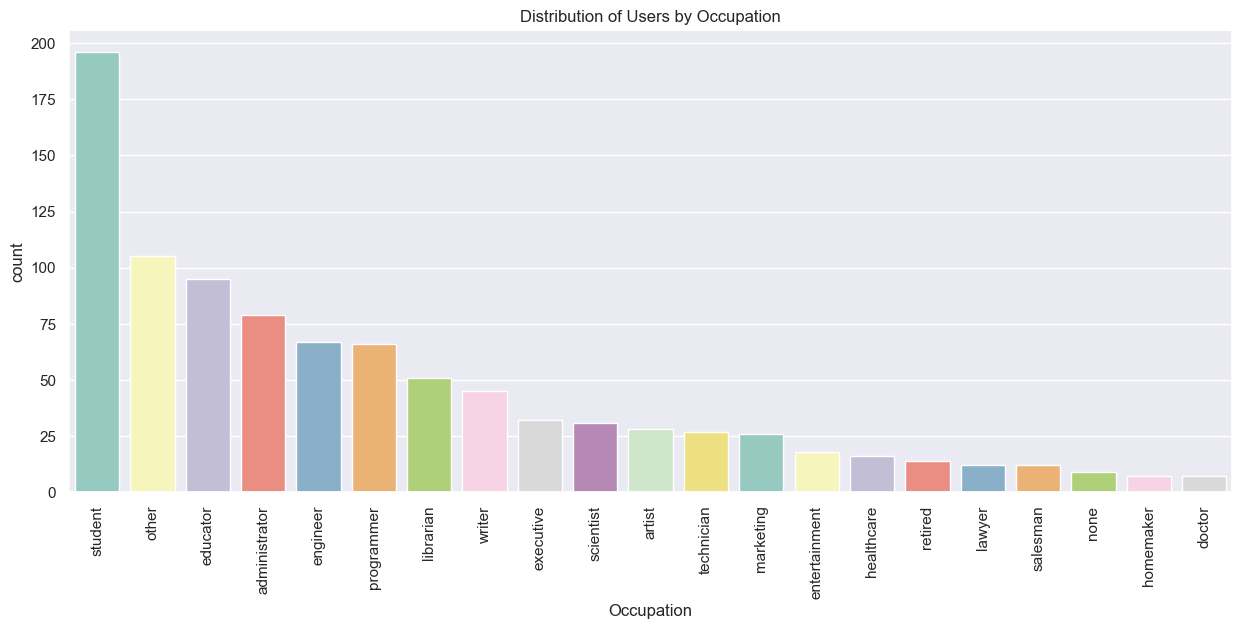

In [40]:
#Distribution of users w.r.t occupation
plt.figure(figsize=(15,6))
sns.countplot(x='Occupation', data=users, palette='Set3', order=users['Occupation'].value_counts().index)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Distribution of Users by Occupation')
plt.show()

It is apparent that students watched more movies followed by others who do not fall in the specified categories. Interestingly, doctors were the least to watch movies probably based on their long shift work hours.

#### Visualize how popularity of genres have changed over the years

In [52]:
genre_by_year = movies.groupby('release_year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

release_year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
movie title,"Nosferatu (Nosferatu, eine Symphonie des Graue...","Scarlet Letter, The (1926)","Blue Angel, The (Blaue Engel, Der) (1930)",M (1931),"Farewell to Arms, A (1932)",Duck Soup (1933)Liebelei (1933),"Thin Man, The (1934)It Happened One Night (193...","39 Steps, The (1935)Bride of Frankenstein (193...",My Man Godfrey (1936)Little Lord Fauntleroy (1...,Snow White and the Seven Dwarfs (1937)Lost Hor...,...,"Weekend at Bernie's (1989)Abyss, The (1989)Hen...",Home Alone (1990)Dances with Wolves (1990)Good...,Terminator 2: Judgment Day (1991)Silence of th...,"Aladdin (1992)Lawnmower Man, The (1992)Reservo...",Three Colors: Blue (1993)What's Eating Gilbert...,"Postino, Il (1994)Crumb (1994)Nadja (1994)Cler...",Toy Story (1995)GoldenEye (1995)Four Rooms (19...,Richard III (1995)Mr. Holland's Opus (1995)Fro...,Fargo (1996)Return of the Jedi (1983)Kolya (19...,Apt Pupil (1998)Desperate Measures (1998)Wag t...
release date,01-Jan-1922,01-Jan-1926,01-Jan-1930,01-Jan-1931,01-Jan-1932,01-Jan-193301-Jan-1933,01-Jan-193401-Jan-193401-Jan-193401-Jan-1934,01-Jan-193501-Jan-193501-Jan-193501-Jan-1935,01-Jan-193601-Jan-1936,01-Jan-193701-Jan-193701-Jan-193701-Jan-1937,...,01-Jan-198901-Jan-198901-Jan-198901-Jan-198901...,01-Jan-199001-Jan-199001-Jan-199001-Jan-199001...,01-Jan-199101-Jan-199101-Jan-199101-Jan-199101...,01-Jan-199201-Jan-199201-Jan-199201-Jan-199201...,01-Jan-199301-Jan-199301-Jan-199301-Jan-199301...,01-Jan-199401-Jan-199401-Jan-199401-Jan-199401...,01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...,22-Jan-199629-Jan-199605-Feb-199616-Feb-199616...,14-Feb-199714-Mar-199724-Jan-199707-Mar-199714...,23-Oct-199830-Jan-199809-Jan-199830-Jan-199816...
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33


In [ ]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

## Find the top 25 movies, each having a minimum of 100 ratings

In [ ]:
items = ratings.groupby('ItemID').count()

items = items[ratings.groupby('ItemID').count().UseID > 100].index

items = ratings.loc[ratings.ItemID.isin(items)]

items = items.groupby('ItemID').mean()

items = items.sort_values('rating',ascending = False)

order = items.index

In [ ]:
rating_list = items.rating[0:25]

In [ ]:
items = movies.loc[movies['movie id'].isin(order)]

In [ ]:
top_25_movies = items.set_index('movie id').loc[order]

top_25_movies = top_25_movies.iloc[0:25, 0]

In [ ]:
top_25_movies = top_25_movies.reset_index()

In [ ]:
top_25_movies['avg_rating'] =  rating_list.values

In [ ]:
top_25_movies

### See gender distribution accross different genres


In [ ]:
movies.columns  # columns of movies dataframe

In [ ]:
users.columns   #columns of users dataframe

In [ ]:
ratings.columns  # columns of ratings dataframe

In [ ]:
ratings.rename(columns= {'UseID' : 'UserID'}, inplace=True)  
#Renaming the column to have the same column name so that we can perform join operation

In [ ]:
result = pd.merge(ratings, users, how='inner', on='UserID')  #merging dataframes with UserID as the key


In [ ]:
movies.rename(columns= {'movie id' : 'ItemID'}, inplace= True)
#Renaming the column to have the same column name so that we can perform join operation

In [ ]:
result = pd.merge(result, movies, how='inner', on='ItemID')  # merging dataframes with ItemID as the key

In [ ]:
result.head()   

In [ ]:
Genre_by_gender = result.groupby('Gender').sum().loc[:,'Action':'Western']  #Group by gender and aggregate with sum and select all the genre columns 

In [ ]:
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)  #Row total of the dataframe

In [ ]:
Genre_by_gender

In [ ]:
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100  #dividing each cell with row total and multiplying by 100

Conclusion: 
* Of all the women, 20% watched Drama   and of all the men,  18% watched Drama
* Of all the women, 4.8% watched Sci-Fi and of all the men,  6.3% watched Sci-Fi

